# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import winsorize

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

from sklearn.metrics import mean_absolute_error, mean_squared_error

from scipy.stats import skew, kurtosis

import os
#import warnings
#warnings.simplefilter(action = "module", category=FutureWarning)


%matplotlib inline

# Creating DataFrames

## Crypto DataFrame

In [3]:
folder_path = os.path.abspath("C:\\Users\\Corey Feld\\Documents\\Year2Semester1\\FIN611\\ResearchProject\\CryptoData")
files = os.listdir(folder_path)

df_crypto = pd.DataFrame()

for file in files:
    df_temp = pd.read_csv("C:\\Users\\Corey Feld\\Documents\\Year2Semester1\\FIN611\\ResearchProject\\CryptoData\\" + file)
    df_temp["Date"] = pd.to_datetime(df_temp["Date"]).dt.date
    df_temp["PercentChange"] = df_temp["Close"].pct_change() * 100
    df_temp["StockName"] = str(file[:-4])
    df_temp = df_temp[["Date", "PercentChange", "StockName"]]
    df_crypto = pd.concat([df_crypto, df_temp])
df_crypto = pd.pivot_table(data = df_crypto, values = "PercentChange", index = "Date", columns = "StockName")
df_crypto.head()

StockName,Basic Attention Token,Bitcoin Gold,Dash,Decentraland,Decred,Enjin Coin,Gnosis,Holo,KuCoin Token,Loopring,...,coin_ChainLink,coin_Dogecoin,coin_EOS,coin_Ethereum,coin_Iota,coin_Litecoin,coin_Monero,coin_Stellar,coin_Tron,coin_XRP
Date,,,,,,,,,,,,,,,,,,,,,
2013-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-1.993886,NaN,NaN,NaN,NaN
2013-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-11.532211,NaN,NaN,NaN,NaN
2013-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-11.287262,NaN,NaN,NaN,NaN
2013-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-9.699642,NaN,NaN,NaN,NaN
2013-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,14.276614,NaN,NaN,NaN,NaN


## SP500 DataFrame

In [4]:
folder_path = os.path.abspath("C:\\Users\\Corey Feld\\Documents\\Year2Semester1\\FIN611\\ResearchProject\\SP500Data")
files = os.listdir(folder_path)

df_sp500 = pd.DataFrame()

for file in files:
    df_temp = pd.read_csv("C:\\Users\\Corey Feld\\Documents\\Year2Semester1\\FIN611\\ResearchProject\\SP500Data\\" + file)
    df_temp["Date"] = pd.to_datetime(df_temp["Date"]).dt.date
    df_temp["PercentChange"] = df_temp["Close"].pct_change() * 100
    df_temp["StockName"] = str(file[:-4])
    df_temp = df_temp[["Date", "PercentChange", "StockName"]]
    df_sp500 = pd.concat([df_sp500, df_temp])
df_sp500 = pd.pivot_table(data = df_sp500, values = "PercentChange", index = "Date", columns = "StockName")
df_sp500.head()

StockName,AAPL,ABBV,ACN,AMD,AMZN,AVGO,BAC,BRK-B,COST,CSCO,...,PFE,PG,TMO,TSLA,UNH,V,WMT,XOM,^IXIC,^RUT
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-2.505933,-0.416598,0.520474,-0.722022,-0.502363,-3.345512,0.000000,0.382409,0.244453,-0.454370,...,0.719874,NaN,-0.172977,0.008950,0.188907,0.752972,2.375527,0.852058,-0.237802,0.164163
2016-01-06,-1.956970,0.017434,-0.195386,-8.727273,-0.179873,-3.075924,-2.130250,0.060954,-0.925402,-1.065048,...,-1.771283,NaN,-0.765286,-1.964817,-1.019885,-1.311132,1.001273,-0.832056,-1.138121,-1.447169
2016-01-07,-4.220457,-0.296274,-2.936570,-9.163347,-3.905796,-3.181027,-3.606965,-1.408670,-2.290937,-2.306805,...,-0.664350,NaN,-2.284466,-1.547662,-2.943980,-1.966250,2.328875,-1.600617,-3.025990,-2.723032
2016-01-08,0.528776,-2.726791,-0.968139,-6.140351,-0.146389,-0.658664,-1.935484,-0.888163,-1.750424,-2.479335,...,-1.273887,NaN,-0.111677,-2.156272,-1.721824,-1.233235,-2.291247,-2.020203,-0.976671,-1.725579
2016-01-11,1.619224,-3.180595,1.048886,9.345794,1.760969,-0.124808,0.723684,0.023376,1.715864,1.977397,...,0.225808,NaN,0.536673,-1.492891,-0.526509,1.427005,1.070192,-1.338867,-0.121449,-0.411004


## Commodity DataFrame

In [5]:
folder_path = os.path.abspath("C:\\Users\\Corey Feld\\Documents\\Year2Semester1\\FIN611\\ResearchProject\\CommodityData")
files = os.listdir(folder_path)

df_comm = pd.DataFrame()

for file in files:
    df_temp = pd.read_csv("C:\\Users\Corey Feld\Documents\Year2Semester1\FIN611\ResearchProject\CommodityData\\" + file)
    df_temp["Date"] = pd.to_datetime(df_temp["Date"]).dt.date
    df_temp["PercentChange"] = df_temp["Change %"].str[:-1].astype("float64")
    df_temp.drop(["Change %"], axis = 1, inplace = True)
    df_temp["StockName"] = str(file[:-28])
    df_temp = df_temp[["Date", "PercentChange", "StockName"]]
    df_comm = pd.concat([df_comm, df_temp])

#df_comm.columns = df_comm.columns.str.strip("'")
df_comm = pd.pivot_table(data = df_comm, values = "PercentChange", index = "Date", columns = "StockName")
df_comm.head()

StockName,Brent Oil,Canola,Class III Milk,Cobalt,Copper,Crude Oil WTI,Feeder Cattle,Gasoline RBOB,Gold,Heating Oil,...,Silver,Tin,US Cocoa,US Coffee C,US Corn,US Cotton #2,US Soybeans,US Sugar #11,US Wheat,Zinc
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,-0.16,-0.57,0.00,-1.28,-2.60,-0.31,0.43,-0.04,1.41,2.33,...,0.28,-0.55,-2.59,-2.17,-2.02,-1.15,-0.77,-1.77,-2.50,-2.55
2016-01-05,-2.15,0.51,-0.44,0.00,0.77,-0.92,0.10,-2.63,0.30,-0.10,...,0.94,-1.87,-2.02,-0.71,0.43,0.17,0.38,-2.67,0.65,0.42
2016-01-06,-6.01,0.38,0.15,0.00,-0.36,-2.13,0.32,-7.55,1.25,-3.96,...,0.04,-2.61,-2.52,-2.40,0.07,-0.89,0.92,-1.03,0.33,-2.07
2016-01-07,-1.40,-1.69,0.37,0.00,-3.16,-1.73,-2.67,-1.36,1.46,-1.40,...,2.63,-0.69,-0.60,-1.23,-0.07,-1.25,0.14,2.29,1.24,-3.34
2016-01-08,-0.59,0.70,0.81,0.00,0.00,-0.15,-2.68,-1.60,-0.90,-1.27,...,-2.97,0.15,1.72,0.50,1.13,0.20,0.29,-1.97,2.13,0.94


# LSTM Function

In [1]:
def lstm(df):
    
    global mse_test_dict
    mse_test_dict = {}
    
    global rmse_test_dict
    rmse_test_dict = {}
    
    global mae_test_dict
    mae_test_dict = {}

    for col in df:

        asset = df[col]
        asset.dropna(inplace = True)
        asset = asset.to_numpy()
        asset = winsorize(asset, limits = [0.1, 0.1])
        asset = pd.Series(asset)
        train_size = int(len(asset) * 0.9)
        train_data = asset.iloc[:train_size]
        test_data = asset.iloc[train_size:len(asset)]

        scaler = StandardScaler()
        train_data = scaler.fit_transform(train_data.values.reshape(-1, 1))

        prediction_days = 21

        x_train = []
        y_train = []

        for x in range(prediction_days, len(train_data)):
            x_train.append(train_data[(x - prediction_days):x, 0])
            y_train.append(train_data[x, 0])

        x_train, y_train = np.array(x_train), np.array(y_train)
        x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

        model = Sequential()

        model.add(LSTM(units = 16, activation = "relu", return_sequences = True, input_shape = (x_train.shape[1],1)))
        model.add(Dropout(0.2))
        model.add(LSTM(units = 8, activation = "sigmoid", return_sequences = False))
        model.add(Dropout(0.2))
        model.add(Dense(units = 1))

        model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00025), loss = "mean_squared_error")
        model.summary()

        history = model.fit(x_train, y_train, epochs = 10, batch_size = 64, validation_split = 0.1)

        actual_price_change = test_data.values
        train_data = train_data.flatten()

        train_data = pd.Series(train_data)
        test_data = pd.Series(test_data)
        total_price_change = pd.concat((train_data, test_data), axis = 0)

        model_inputs = total_price_change[len(total_price_change) - len(test_data) - prediction_days:].values
        model_inputs = model_inputs.reshape(-1,1)
        model_inputs = scaler.transform(model_inputs)

        X_test = []

        for x in range(prediction_days, len(model_inputs)):
            X_test.append(model_inputs[(x - prediction_days):x, 0])

        X_test = np.array(X_test)
        X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

        pred_test = model.predict(X_test)
        pred_test = pred_test.flatten().reshape(-1, 1)
        pred_test = scaler.inverse_transform(pred_test)

        mse_test = mean_squared_error(test_data, pred_test)
        rmse_test = np.sqrt(mse_test)
        mae_test = mean_absolute_error(test_data, pred_test)
        mse_test_dict[col] = mse_test
        rmse_test_dict[col] = rmse_test
        mae_test_dict[col] = mae_test
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('model train vs validation loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'validation'], loc='upper right')
        plt.show()
    
    mse_test_dict = sorted(mse_test_dict.items(), key = lambda x:x[0])
    
    rmse_test_dict = sorted(rmse_test_dict.items(), key = lambda x:x[0])
    
    mae_test_dict = sorted(mae_test_dict.items(), key = lambda x:x[0])

# LSTM on Crpyto DataFrame

In [2]:
lstm(df_crypto)
lstm_crypto_mse_dict = mse_test_dict
lstm_crypto_rmse_dict = rmse_test_dict
lstm_crypto_mae_dict = mae_test_dict
print(lstm_crypto_mse_dict)
print(lstm_crypto_rmse_dict)
print(lstm_crypto_mae_dict)

NameError: name 'df_crypto' is not defined

# LSTM on SP500 DataFrame

Model: "sequential_193"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_386 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_386 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_387 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_387 (Dropout)       (None, 8)                 0         
                                                                 
 dense_193 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

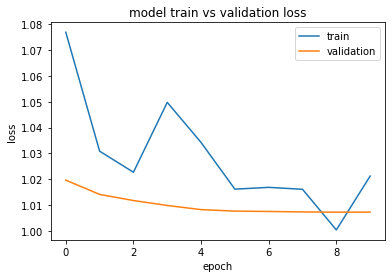

Model: "sequential_194"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_388 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_388 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_389 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_389 (Dropout)       (None, 8)                 0         
                                                                 
 dense_194 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

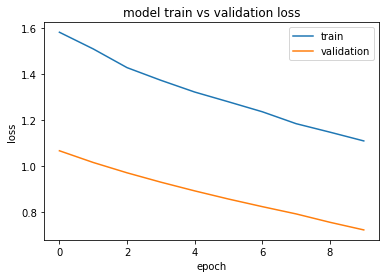

Model: "sequential_195"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_390 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_390 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_391 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_391 (Dropout)       (None, 8)                 0         
                                                                 
 dense_195 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

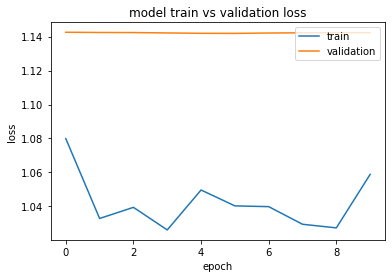

Model: "sequential_196"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_392 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_392 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_393 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_393 (Dropout)       (None, 8)                 0         
                                                                 
 dense_196 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

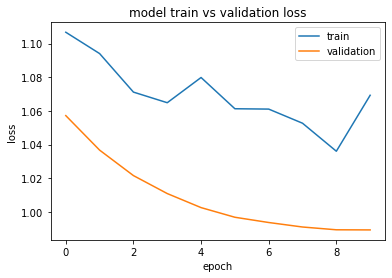

Model: "sequential_197"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_394 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_394 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_395 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_395 (Dropout)       (None, 8)                 0         
                                                                 
 dense_197 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

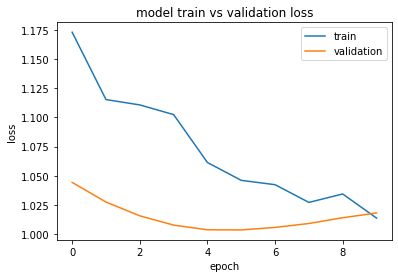

Model: "sequential_198"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_396 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_396 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_397 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_397 (Dropout)       (None, 8)                 0         
                                                                 
 dense_198 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

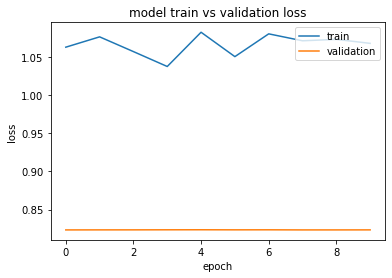

Model: "sequential_199"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_398 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_398 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_399 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_399 (Dropout)       (None, 8)                 0         
                                                                 
 dense_199 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

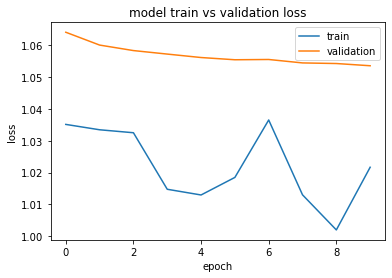

Model: "sequential_200"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_400 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_400 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_401 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_401 (Dropout)       (None, 8)                 0         
                                                                 
 dense_200 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

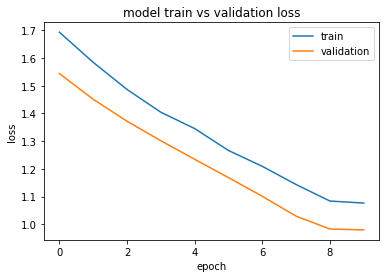

Model: "sequential_201"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_402 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_402 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_403 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_403 (Dropout)       (None, 8)                 0         
                                                                 
 dense_201 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

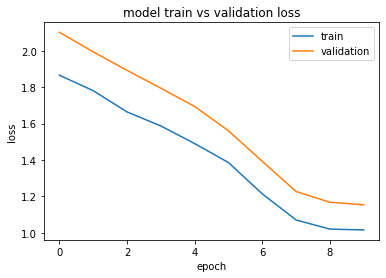

Model: "sequential_202"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_404 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_404 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_405 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_405 (Dropout)       (None, 8)                 0         
                                                                 
 dense_202 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

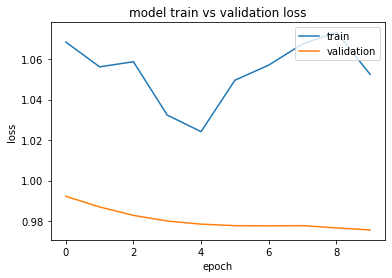

Model: "sequential_203"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_406 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_406 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_407 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_407 (Dropout)       (None, 8)                 0         
                                                                 
 dense_203 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

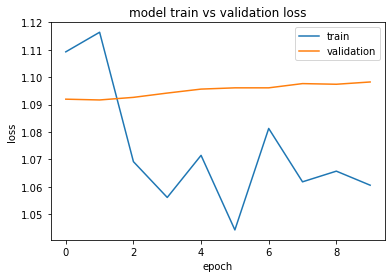

Model: "sequential_204"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_408 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_408 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_409 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_409 (Dropout)       (None, 8)                 0         
                                                                 
 dense_204 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

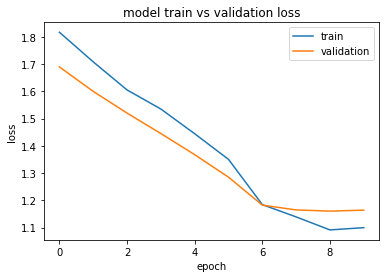

Model: "sequential_205"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_410 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_410 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_411 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_411 (Dropout)       (None, 8)                 0         
                                                                 
 dense_205 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

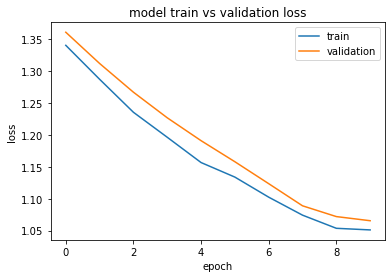

Model: "sequential_206"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_412 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_412 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_413 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_413 (Dropout)       (None, 8)                 0         
                                                                 
 dense_206 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

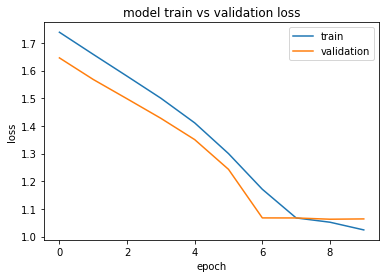

Model: "sequential_207"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_414 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_414 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_415 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_415 (Dropout)       (None, 8)                 0         
                                                                 
 dense_207 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

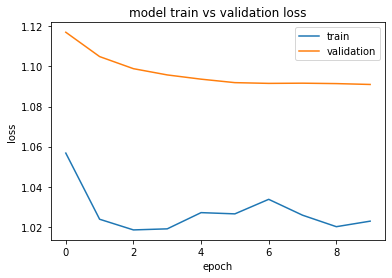

Model: "sequential_208"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_416 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_416 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_417 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_417 (Dropout)       (None, 8)                 0         
                                                                 
 dense_208 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

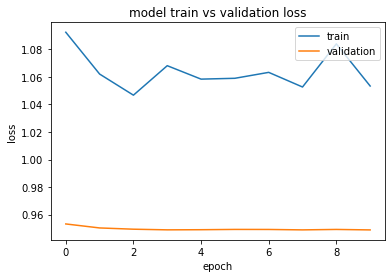

Model: "sequential_209"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_418 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_418 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_419 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_419 (Dropout)       (None, 8)                 0         
                                                                 
 dense_209 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

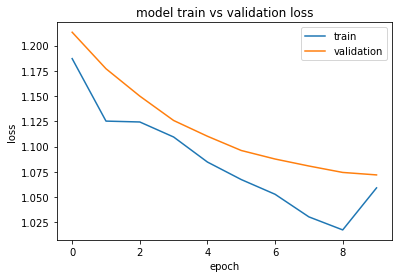

Model: "sequential_210"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_420 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_420 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_421 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_421 (Dropout)       (None, 8)                 0         
                                                                 
 dense_210 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

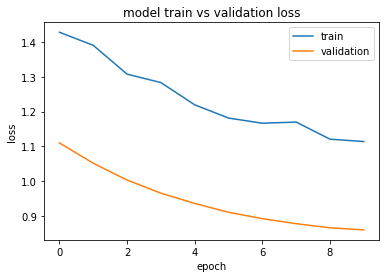

Model: "sequential_211"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_422 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_422 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_423 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_423 (Dropout)       (None, 8)                 0         
                                                                 
 dense_211 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

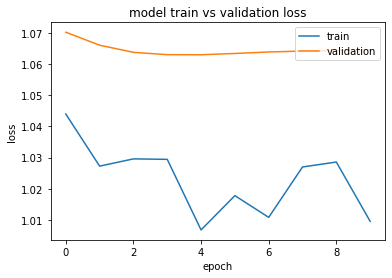

Model: "sequential_212"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_424 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_424 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_425 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_425 (Dropout)       (None, 8)                 0         
                                                                 
 dense_212 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

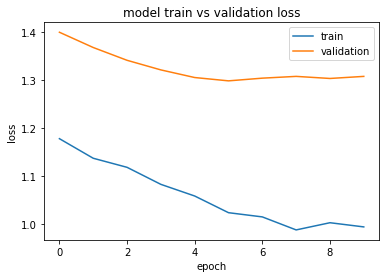

Model: "sequential_213"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_426 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_426 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_427 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_427 (Dropout)       (None, 8)                 0         
                                                                 
 dense_213 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

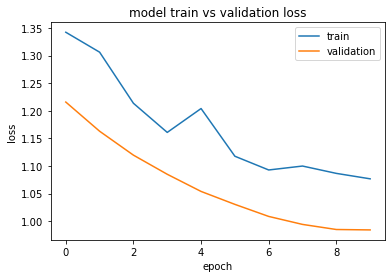

Model: "sequential_214"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_428 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_428 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_429 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_429 (Dropout)       (None, 8)                 0         
                                                                 
 dense_214 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

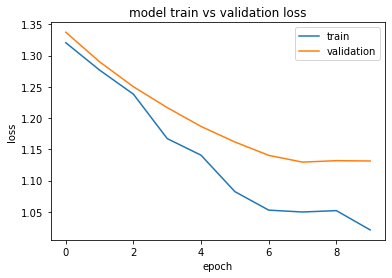

Model: "sequential_215"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_430 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_430 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_431 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_431 (Dropout)       (None, 8)                 0         
                                                                 
 dense_215 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

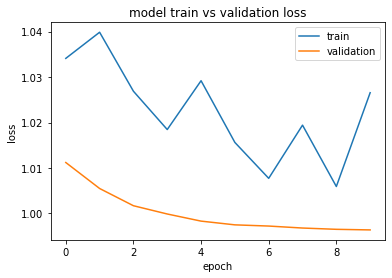

Model: "sequential_216"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_432 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_432 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_433 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_433 (Dropout)       (None, 8)                 0         
                                                                 
 dense_216 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

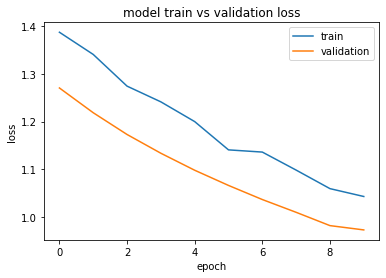

Model: "sequential_217"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_434 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_434 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_435 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_435 (Dropout)       (None, 8)                 0         
                                                                 
 dense_217 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

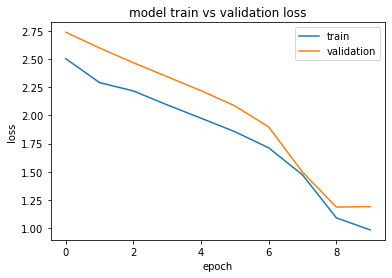

Model: "sequential_218"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_436 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_436 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_437 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_437 (Dropout)       (None, 8)                 0         
                                                                 
 dense_218 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

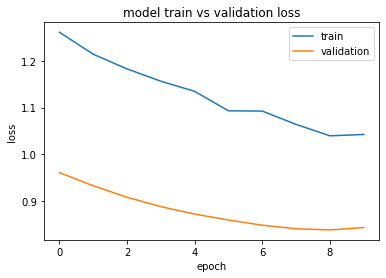

Model: "sequential_219"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_438 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_438 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_439 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_439 (Dropout)       (None, 8)                 0         
                                                                 
 dense_219 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

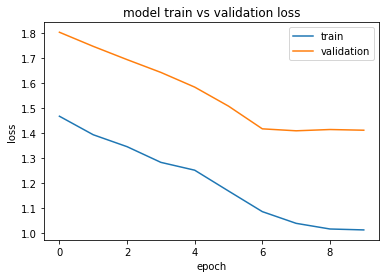

Model: "sequential_220"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_440 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_440 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_441 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_441 (Dropout)       (None, 8)                 0         
                                                                 
 dense_220 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
6/6 [==============================] - 

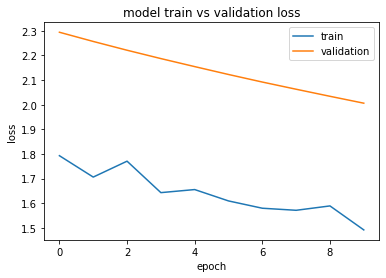

Model: "sequential_221"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_442 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_442 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_443 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_443 (Dropout)       (None, 8)                 0         
                                                                 
 dense_221 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

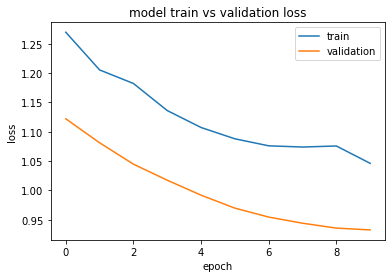

Model: "sequential_222"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_444 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_444 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_445 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_445 (Dropout)       (None, 8)                 0         
                                                                 
 dense_222 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

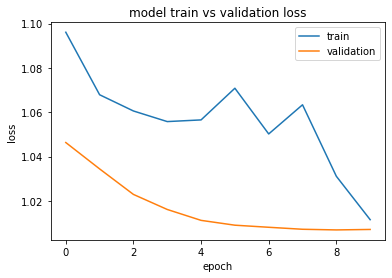

Model: "sequential_223"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_446 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_446 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_447 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_447 (Dropout)       (None, 8)                 0         
                                                                 
 dense_223 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

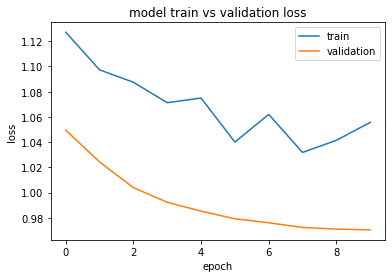

Model: "sequential_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_448 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_448 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_449 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_449 (Dropout)       (None, 8)                 0         
                                                                 
 dense_224 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

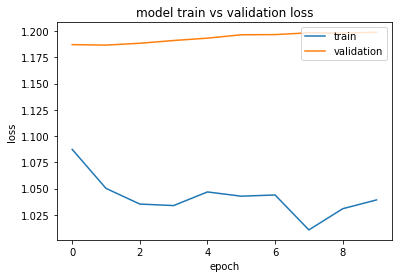

Model: "sequential_225"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_450 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_450 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_451 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_451 (Dropout)       (None, 8)                 0         
                                                                 
 dense_225 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

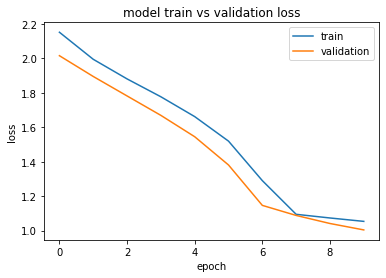

Model: "sequential_226"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_452 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_452 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_453 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_453 (Dropout)       (None, 8)                 0         
                                                                 
 dense_226 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

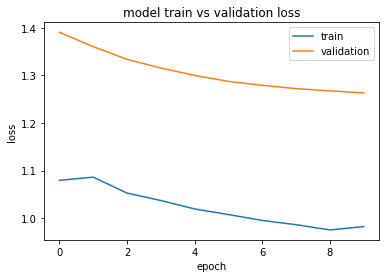

Model: "sequential_227"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_454 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_454 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_455 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_455 (Dropout)       (None, 8)                 0         
                                                                 
 dense_227 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

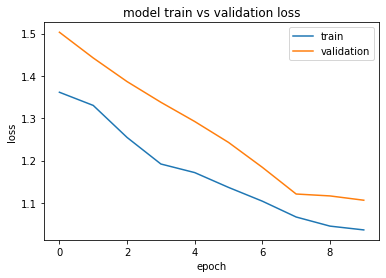

Model: "sequential_228"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_456 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_456 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_457 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_457 (Dropout)       (None, 8)                 0         
                                                                 
 dense_228 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

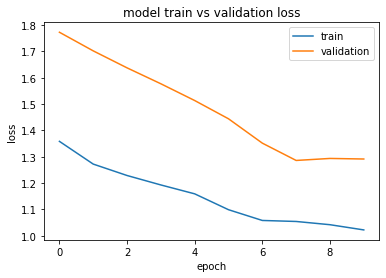

{'AAPL': 2.2949395373209573, 'ABBV': 1.153375715543056, 'ACN': 1.3453383271334183, 'AMD': 8.088597068568726, 'AMZN': 3.003060918520376, 'AVGO': 2.795305676838295, 'BAC': 2.2391317771999217, 'BRK-B': 0.909556251401296, 'COST': 1.2044123882017146, 'CSCO': 1.431111113850886, 'CVX': 2.0811225073480752, 'DIS': 1.9268686647130087, 'GOOG': 2.1273238871346525, 'GOOGL': 2.355300868614869, 'HD': 1.3732592974199793, 'JNJ': 0.6642527004451465, 'JPM': 1.82035003682512, 'KO': 0.6755882786022828, 'LLY': 1.5504290073266183, 'MA': 1.762525218493742, 'MCD': 0.7578033497079418, 'META': 3.3129436124486094, 'MRK': 0.8052889326815219, 'MSFT': 1.983153692974894, 'NVDA': 6.817648552693016, 'PEP': 0.6573313992990434, 'PFE': 1.3250204373651855, 'PG': 1.4849638509976415, 'TMO': 1.6652771850481105, 'TSLA': 7.195510103398551, 'UNH': 1.2644942277212232, 'V': 1.4506564156918138, 'WMT': 0.8729087900882526, 'XOM': 2.3949804798928875, '^IXIC': 1.4695409916300066, '^RUT': 1.5294517320948204}
{'AAPL': 1.5149057849651764,

In [27]:
lstm(df_sp500)
lstm_sp500_mse_dict = mse_test_dict
lstm_sp500_rmse_dict = rmse_test_dict
lstm_sp500_mae_dict = mae_test_dict
print(lstm_sp500_mse_dict)
print(lstm_sp500_rmse_dict)
print(lstm_sp500_mae_dict)

# LSTM on Commodity DataFrame

Model: "sequential_229"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_458 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_458 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_459 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_459 (Dropout)       (None, 8)                 0         
                                                                 
 dense_229 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

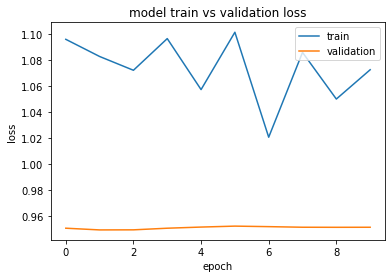

Model: "sequential_230"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_460 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_460 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_461 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_461 (Dropout)       (None, 8)                 0         
                                                                 
 dense_230 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

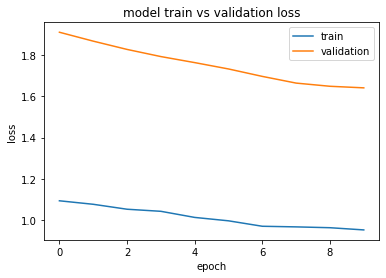

Model: "sequential_231"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_462 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_462 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_463 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_463 (Dropout)       (None, 8)                 0         
                                                                 
 dense_231 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

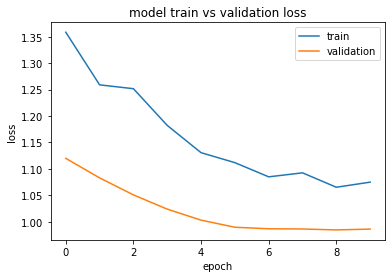

Model: "sequential_232"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_464 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_464 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_465 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_465 (Dropout)       (None, 8)                 0         
                                                                 
 dense_232 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
21/21 [==============================] 

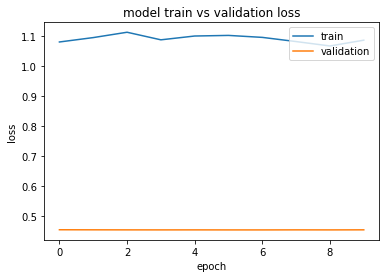

Model: "sequential_233"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_466 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_466 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_467 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_467 (Dropout)       (None, 8)                 0         
                                                                 
 dense_233 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

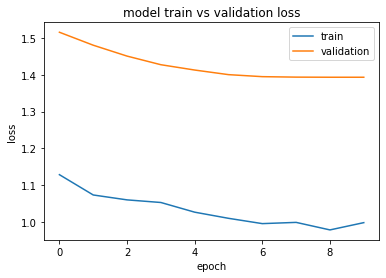

Model: "sequential_234"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_468 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_468 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_469 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_469 (Dropout)       (None, 8)                 0         
                                                                 
 dense_234 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
23/23 [==============================] 

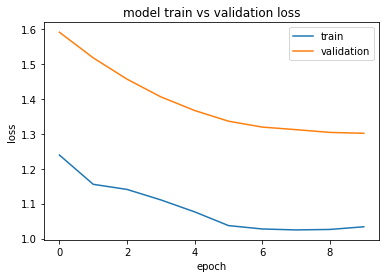

Model: "sequential_235"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_470 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_470 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_471 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_471 (Dropout)       (None, 8)                 0         
                                                                 
 dense_235 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

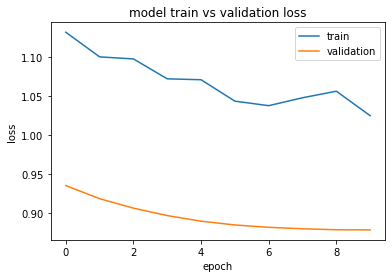

Model: "sequential_236"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_472 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_472 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_473 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_473 (Dropout)       (None, 8)                 0         
                                                                 
 dense_236 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
27/27 [==============================] 

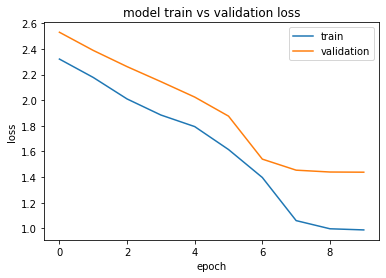

Model: "sequential_237"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_474 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_474 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_475 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_475 (Dropout)       (None, 8)                 0         
                                                                 
 dense_237 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

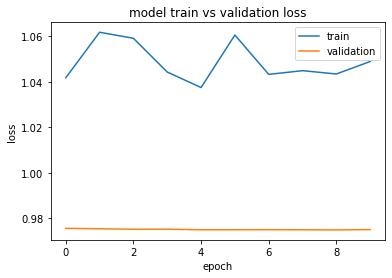

Model: "sequential_238"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_476 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_476 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_477 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_477 (Dropout)       (None, 8)                 0         
                                                                 
 dense_238 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
23/23 [==============================] 

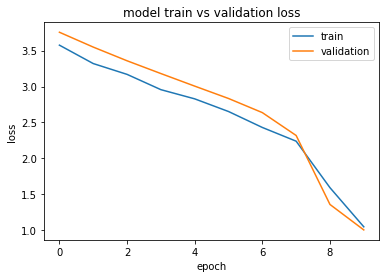

Model: "sequential_239"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_478 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_478 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_479 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_479 (Dropout)       (None, 8)                 0         
                                                                 
 dense_239 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

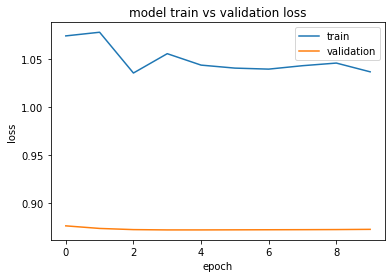

Model: "sequential_240"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_480 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_480 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_481 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_481 (Dropout)       (None, 8)                 0         
                                                                 
 dense_240 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

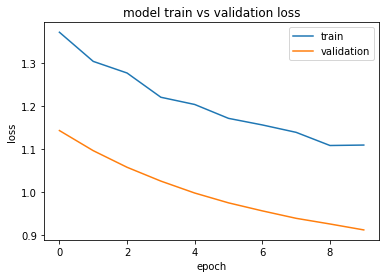

Model: "sequential_241"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_482 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_482 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_483 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_483 (Dropout)       (None, 8)                 0         
                                                                 
 dense_241 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

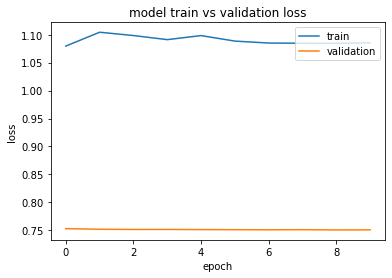

Model: "sequential_242"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_484 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_484 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_485 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_485 (Dropout)       (None, 8)                 0         
                                                                 
 dense_242 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

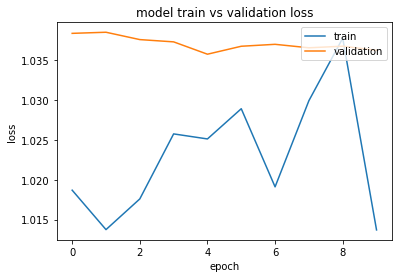

Model: "sequential_243"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_486 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_486 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_487 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_487 (Dropout)       (None, 8)                 0         
                                                                 
 dense_243 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

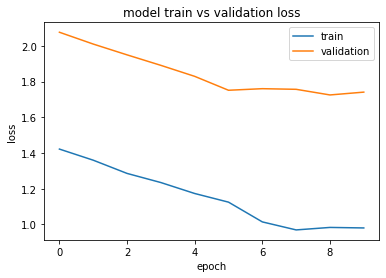

Model: "sequential_244"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_488 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_488 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_489 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_489 (Dropout)       (None, 8)                 0         
                                                                 
 dense_244 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
23/23 [==============================] 

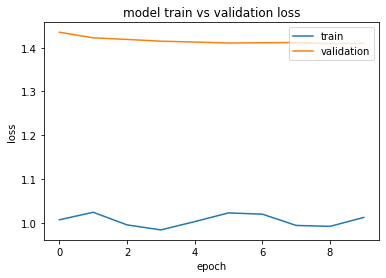

Model: "sequential_245"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_490 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_490 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_491 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_491 (Dropout)       (None, 8)                 0         
                                                                 
 dense_245 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

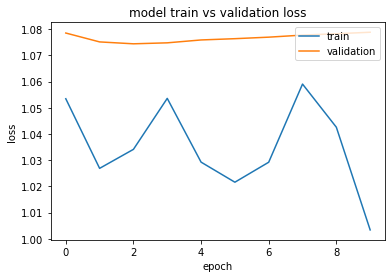

Model: "sequential_246"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_492 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_492 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_493 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_493 (Dropout)       (None, 8)                 0         
                                                                 
 dense_246 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

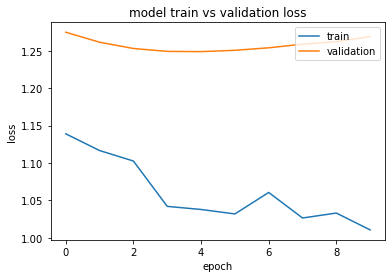

Model: "sequential_247"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_494 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_494 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_495 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_495 (Dropout)       (None, 8)                 0         
                                                                 
 dense_247 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

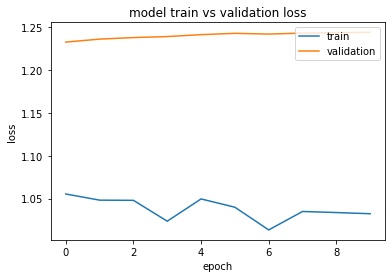

Model: "sequential_248"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_496 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_496 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_497 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_497 (Dropout)       (None, 8)                 0         
                                                                 
 dense_248 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
25/25 [==============================] 

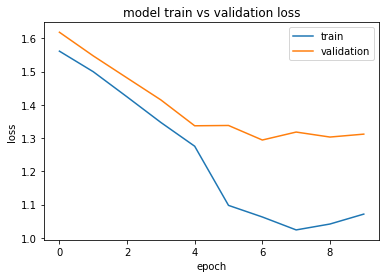

Model: "sequential_249"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_498 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_498 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_499 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_499 (Dropout)       (None, 8)                 0         
                                                                 
 dense_249 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
27/27 [==============================] 

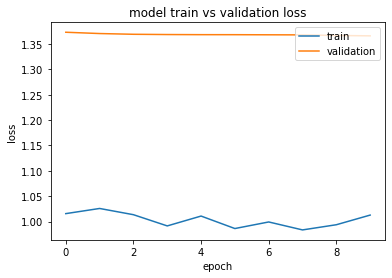

Model: "sequential_250"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_500 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_500 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_501 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_501 (Dropout)       (None, 8)                 0         
                                                                 
 dense_250 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

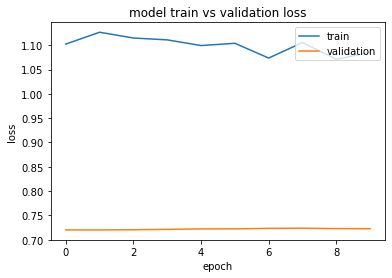

Model: "sequential_251"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_502 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_502 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_503 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_503 (Dropout)       (None, 8)                 0         
                                                                 
 dense_251 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

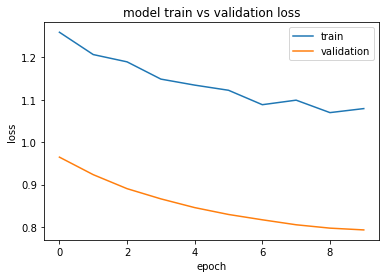

Model: "sequential_252"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_504 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_504 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_505 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_505 (Dropout)       (None, 8)                 0         
                                                                 
 dense_252 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

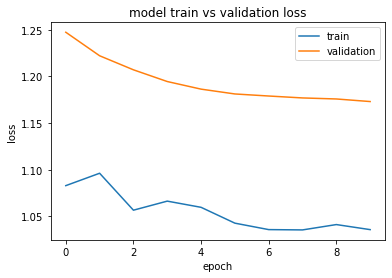

Model: "sequential_253"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_506 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_506 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_507 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_507 (Dropout)       (None, 8)                 0         
                                                                 
 dense_253 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

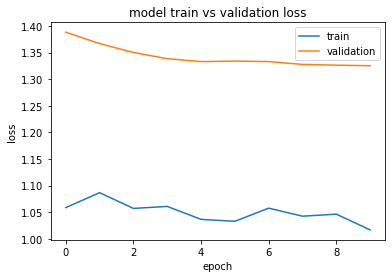

Model: "sequential_254"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_508 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_508 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_509 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_509 (Dropout)       (None, 8)                 0         
                                                                 
 dense_254 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

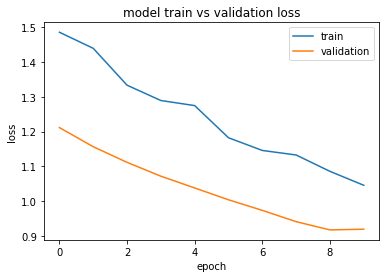

Model: "sequential_255"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_510 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_510 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_511 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_511 (Dropout)       (None, 8)                 0         
                                                                 
 dense_255 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

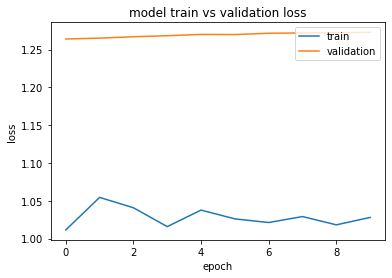

Model: "sequential_256"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_512 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_512 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_513 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_513 (Dropout)       (None, 8)                 0         
                                                                 
 dense_256 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

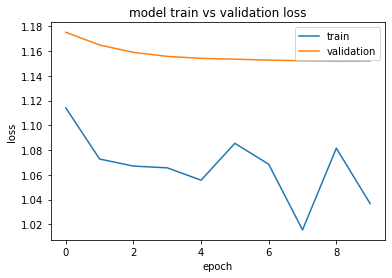

Model: "sequential_257"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_514 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_514 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_515 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_515 (Dropout)       (None, 8)                 0         
                                                                 
 dense_257 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

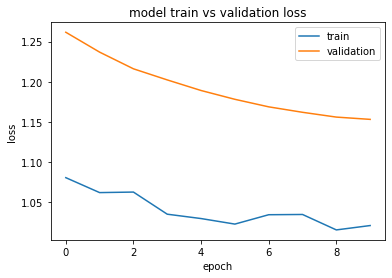

Model: "sequential_258"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_516 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_516 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_517 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_517 (Dropout)       (None, 8)                 0         
                                                                 
 dense_258 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

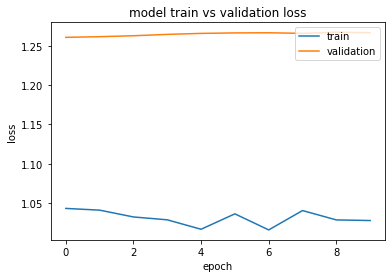

Model: "sequential_259"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_518 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_518 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_519 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_519 (Dropout)       (None, 8)                 0         
                                                                 
 dense_259 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

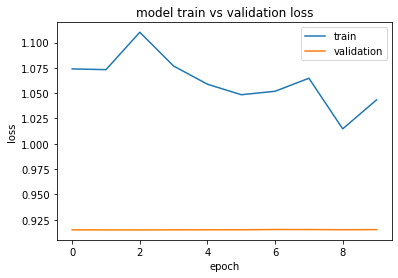

Model: "sequential_260"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_520 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_520 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_521 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_521 (Dropout)       (None, 8)                 0         
                                                                 
 dense_260 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

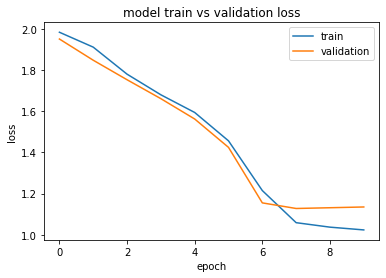

Model: "sequential_261"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_522 (LSTM)             (None, 21, 16)            1152      
                                                                 
 dropout_522 (Dropout)       (None, 21, 16)            0         
                                                                 
 lstm_523 (LSTM)             (None, 8)                 800       
                                                                 
 dropout_523 (Dropout)       (None, 8)                 0         
                                                                 
 dense_261 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
22/22 [==============================] 

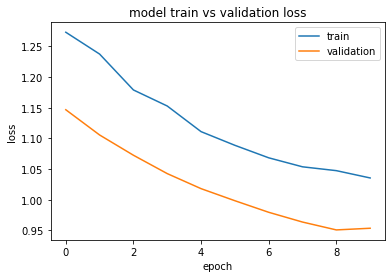

{'Brent Oil': 3.760435726865281, 'Canola': 1.0141974717736275, 'Class III Milk': 0.08802726268851202, 'Cobalt': 0.14781000021815555, 'Copper': 1.24739802365216, 'Crude Oil WTI': 2.4357623322934483, 'Feeder Cattle': 0.7361680928842471, 'Gasoline RBOB': 11.241424081406587, 'Gold': 0.4374808889058993, 'Heating Oil': 3.696728026129908, 'Lead': 1.3687687284161925, 'Lean Hogs': 1.8330848536791107, 'Live Cattle': 0.4497615939480294, 'London Gas Oil': 4.243737716901065, 'Lumber': 5.382042206050935, 'Natural Gas': 8.0762120873592, 'Nickel': 2.8773830970669123, 'Oats': 3.2508952392692985, 'Orange Juice': 3.0946960871984173, 'Palladium': 2.768965720967957, 'Platinum': 1.5249016026284545, 'Rough Rice': 0.9669638248475321, 'Rubber RSS3': 1.2701381437731822, 'Silver': 1.657866168335673, 'Tin': 1.1337126340300236, 'US Cocoa': 1.6333225413922217, 'US Coffee C': 2.7531363581289594, 'US Corn': 1.5667398408105582, 'US Cotton #2': 1.8665961892552552, 'US Soybeans': 1.24665240839218, 'US Sugar #11': 1.4973

In [28]:
lstm(df_comm)
lstm_comm_mse_dict = mse_test_dict
lstm_comm_rmse_dict = rmse_test_dict
lstm_comm_mae_dict = mae_test_dict
print(lstm_comm_mse_dict)
print(lstm_comm_rmse_dict)
print(lstm_comm_mae_dict)

# Statistics

In [10]:
asset_list = [df_crypto, df_sp500, df_comm]

## First 4 Moments

### Mean (Moment #1)

#### Crypto Data

In [10]:
crypto_mean_dict = {}

for coin in df_crypto:
    df_crypto[coin].dropna(inplace = True)
    crypto_mean_dict[coin] = np.mean(df_crypto[coin])
crypto_mean_dict = sorted(crypto_mean_dict.items(), key = lambda x:x[1], reverse = True)
print(crypto_mean_dict)

[('coin_BinanceCoin', 0.8492775520270804), ('coin_Dogecoin', 0.66216483730642), ('coin_ChainLink', 0.6588385195458757), ('coin_Tron', 0.6562704748779126), ('Decentraland', 0.5976119886361284), ('coin_Cardano', 0.5876348931586981), ('coin_Ethereum', 0.5669512082132042), ('Enjin Coin', 0.5390000328875506), ('coin_Stellar', 0.47097420746636437), ('coin_XRP', 0.44782858950471194), ('coin_Monero', 0.4140174864819732), ('Theta Network', 0.40189922689294305), ('KuCoin Token', 0.4013231880123323), ('Loopring', 0.38939178619654014), ('coin_Litecoin', 0.3262008891692962), ('coin_EOS', 0.30042140179621585), ('coin_Iota', 0.3000377263130425), ('coin_Bitcoin', 0.2740619541362274), ('Basic Attention Token', 0.2702549635639715), ('Gnosis', 0.25093098896097216), ('Waves', 0.24965550355992103), ('Tezos', 0.247791320739236), ('Holo', 0.20496145545062552), ('Zilliqa', 0.19974399969335535), ('Qtum', 0.18560158891594017), ('Decred', 0.18042856135830887), ('Bitcoin Gold', 0.16774939491458613), ('NEM', 0.157

#### SP500 Data

In [22]:
sp500_mean_dict = {}

for stock in df_sp500:
    df_sp500[stock].dropna(inplace = True)
    sp500_mean_dict[stock] = np.mean(df_sp500[stock])
sp500_mean_dict = sorted(sp500_mean_dict.items(), key = lambda x:x[1], reverse = True)
print(sp500_mean_dict)

[('AMD', 0.2621499175165746), ('TSLA', 0.23105454504981432), ('NVDA', 0.2121863074675917), ('AAPL', 0.11875056028890528), ('MSFT', 0.10423558203428064), ('UNH', 0.10310632967662375), ('AMZN', 0.09930139296512516), ('LLY', 0.09662375580987839), ('AVGO', 0.09609936274562177), ('TMO', 0.09375546337266026), ('MA', 0.08585804412665062), ('COST', 0.07490788310710404), ('GOOG', 0.07463418698334891), ('GOOGL', 0.07288310468305619), ('ACN', 0.07103531050078302), ('ABBV', 0.06866594980225121), ('V', 0.06733200398049799), ('BAC', 0.061151590910713656), ('HD', 0.05986434414741692), ('^IXIC', 0.05834987954761389), ('WMT', 0.055168863631161184), ('CVX', 0.054613519565292715), ('BRK-B', 0.05314245809198882), ('MCD', 0.05117312621729972), ('JPM', 0.049495928175043176), ('META', 0.04549259375857325), ('MRK', 0.043101262317129616), ('CSCO', 0.0415607093996591), ('^RUT', 0.039009109996255495), ('PEP', 0.038380832921782904), ('JNJ', 0.03638930513899631), ('PFE', 0.03314862602801395), ('XOM', 0.03239632897

#### Commodity Data

In [15]:
comm_mean_dict = {}

for commodity in df_comm:
    df_comm[commodity].dropna(inplace = True)
    comm_mean_dict[commodity] = np.mean(df_comm[commodity])
comm_mean_dict = sorted(comm_mean_dict.items(), key = lambda x:x[1], reverse = True)
print(comm_mean_dict)

[('Gasoline RBOB', 0.2668353221957038), ('Natural Gas', 0.11953475336322862), ('Crude Oil WTI', 0.11391596638655463), ('London Gas Oil', 0.10900457665903893), ('Nickel', 0.10145369284876904), ('Heating Oil', 0.09780269058295955), ('Palladium', 0.09228342513770653), ('Brent Oil', 0.08807097882083564), ('Lumber', 0.08360674810936587), ('Oats', 0.06915005861664712), ('Lean Hogs', 0.06497959183673455), ('Cobalt', 0.061464615384615215), ('US Wheat', 0.057636572742955645), ('Class III Milk', 0.05471764705882354), ('US Coffee C', 0.051456253669994), ('US Corn', 0.05069982648930023), ('Zinc', 0.04949093036863659), ('Canola', 0.04407341622261691), ('Orange Juice', 0.03978273634762187), ('Silver', 0.03841505131128849), ('Copper', 0.03701424501424493), ('Rough Rice', 0.036186291739894606), ('US Cotton #2', 0.03524561403508773), ('US Soybeans', 0.03409798270893366), ('Gold', 0.032027491408934704), ('Rubber RSS3', 0.031037344398340345), ('Tin', 0.029444119368051483), ('US Sugar #11', 0.026002344665

### Variance (Moment #2)

#### Crpyto Data

In [23]:
crypto_variance_dict = {}

for coin in df_crypto:
    df_crypto[coin].dropna(inplace = True)
    crypto_variance_dict[coin] = np.var(df_crypto[coin])
crypto_variance_dict = sorted(crypto_variance_dict.items(), key = lambda x:x[1], reverse = True)
print(crypto_variance_dict)

[('coin_Dogecoin', 128.68134722526338), ('Holo', 99.1823751893645), ('coin_Tron', 90.68727087626435), ('Decentraland', 89.24687616383639), ('Enjin Coin', 81.41280266924866), ('Loopring', 72.4155515370111), ('coin_Cardano', 69.83534053981262), ('coin_XRP', 66.5070268315982), ('coin_Stellar', 66.4459823701378), ('coin_ChainLink', 64.60259571985885), ('coin_BinanceCoin', 64.03534568905003), ('Bitcoin Gold', 61.76059737730862), ('Theta Network', 59.37068478749129), ('Zilliqa', 58.90014862985682), ('NEM', 58.23183116156245), ('coin_EOS', 56.90135514886939), ('KuCoin Token', 55.68171287191637), ('coin_Iota', 54.06354506625439), ('Qtum', 53.098108379423905), ('Waves', 52.47767206735305), ('Tezos', 50.82171815691102), ('coin_Monero', 48.75389166238476), ('coin_Litecoin', 46.950963011914624), ('Basic Attention Token', 45.20034940570019), ('Gnosis', 42.971969456587374), ('Decred', 39.95120250855668), ('coin_Ethereum', 39.71648986669499), ('Neo', 39.536510267511154), ('Dash', 38.480040985072876),

#### SP500 Data

In [16]:
sp500_variance_dict = {}

for stock in df_sp500:
    df_sp500[stock].dropna(inplace = True)
    sp500_variance_dict[stock] = np.var(df_sp500[stock])
sp500_variance_dict = sorted(sp500_variance_dict.items(), key = lambda x:x[1], reverse = True)
print(sp500_variance_dict)

[('AMD', 15.204968389284103), ('TSLA', 13.49590472556424), ('NVDA', 9.623176478396887), ('META', 5.382707617477226), ('AVGO', 4.7504206585512305), ('BAC', 4.429073141110846), ('AMZN', 4.168078239805609), ('CVX', 4.079140855719526), ('XOM', 3.5788514063159105), ('AAPL', 3.5657110606938973), ('MA', 3.4685884800146822), ('JPM', 3.426736111512436), ('DIS', 3.1601939529637346), ('LLY', 3.04123855972981), ('MSFT', 3.027896989429233), ('GOOGL', 3.0169060739120566), ('GOOG', 3.001386848631203), ('ABBV', 2.985925809907652), ('UNH', 2.8566889443291608), ('CSCO', 2.8422205736503354), ('V', 2.791935405206786), ('TMO', 2.6307347765758857), ('HD', 2.5991791493041365), ('ACN', 2.554790354042392), ('^RUT', 2.3260870229249453), ('PFE', 2.222516992042662), ('COST', 2.0114896910847215), ('^IXIC', 1.9969304971202178), ('WMT', 1.9669693103584025), ('MRK', 1.9396806478893223), ('MCD', 1.8900563476357854), ('BRK-B', 1.6973996369784035), ('PEP', 1.5655549397989186), ('KO', 1.499327846352637), ('JNJ', 1.433362

#### Commodity Data

In [22]:
comm_variance_dict = {}

for commodity in df_comm:
    df_comm[commodity].dropna(inplace = True)
    comm_variance_dict[commodity] = np.var(df_comm[commodity])
comm_variance_dict = sorted(comm_variance_dict.items(), key = lambda x:x[1], reverse = True)
print(comm_variance_dict)

[('Gasoline RBOB', 47.68906926882391), ('Crude Oil WTI', 18.18478147192995), ('Natural Gas', 11.765429548119577), ('Nickel', 10.453703982908399), ('Lumber', 10.389530446865466), ('Lean Hogs', 8.110053571012076), ('Brent Oil', 7.00823720618124), ('London Gas Oil', 6.8467877963177175), ('Oats', 6.518869910659434), ('Heating Oil', 5.946618266001727), ('Class III Milk', 5.623704332041486), ('Palladium', 4.517783569144393), ('Orange Juice', 4.3242502757559915), ('US Wheat', 4.07000459247497), ('US Coffee C', 3.772010915144386), ('US Sugar #11', 3.3032955076146693), ('Silver', 3.130688479955905), ('US Cocoa', 3.071745127888482), ('Rubber RSS3', 2.9051334230274417), ('Cobalt', 2.853235762594112), ('US Cotton #2', 2.7506244718374875), ('US Corn', 2.6621595449450255), ('Rough Rice', 2.66018188210851), ('Zinc', 2.4127656273314315), ('Platinum', 2.376987933321716), ('Lead', 2.050718974045539), ('Tin', 1.9459742375151563), ('Live Cattle', 1.8627447773526042), ('Copper', 1.7867246465207292), ('Feed

### Skewness (Moment #3)

#### Crypto Data

In [21]:
crypto_skewness_dict = {}

for coin in df_crypto:
    df_crypto[coin].dropna(inplace = True)
    crypto_skewness_dict[coin] = df_crypto[coin].skew()
crypto_skewness_dict = sorted(crypto_skewness_dict.items(), key = lambda x:x[1], reverse = True)
print(crypto_skewness_dict)

[('coin_Dogecoin', 14.818002966471365), ('NEM', 6.73282445834949), ('Decentraland', 5.578942918999688), ('coin_XRP', 5.548677700888589), ('coin_Cardano', 4.977004159215165), ('coin_Tron', 4.411585162702538), ('coin_Litecoin', 4.149653226012772), ('Bitcoin Gold', 3.8575273081156802), ('coin_Stellar', 3.8095182439116555), ('Enjin Coin', 3.3836490776336774), ('KuCoin Token', 2.9907711362608493), ('coin_BinanceCoin', 2.73140733009655), ('Decred', 2.5713472428793867), ('Zilliqa', 2.0693763034035597), ('Holo', 1.9575541938785341), ('Waves', 1.5380869508889696), ('Loopring', 1.4733705800524832), ('Qtum', 1.448264107624723), ('coin_Monero', 1.379282420508093), ('Dash', 1.3330504524371776), ('coin_EOS', 1.0908640704436978), ('Theta Network', 0.9608986929875235), ('Gnosis', 0.9446019145412053), ('coin_ChainLink', 0.9396036670614212), ('coin_Ethereum', 0.8557671284665911), ('Tezos', 0.7302013276819886), ('coin_Iota', 0.60092330494194), ('Basic Attention Token', 0.5640562269755255), ('Neo', 0.2481

#### SP500 Data

In [23]:
sp500_skewness_dict = {}

for stock in df_sp500:
    df_sp500[stock].dropna(inplace = True)
    sp500_skewness_dict[stock] = df_sp500[stock].skew()
sp500_skewness_dict = sorted(sp500_skewness_dict.items(), key = lambda x:x[1], reverse = True)
print(sp500_skewness_dict)

[('AMD', 1.5275456914205634), ('LLY', 1.0586497548676013), ('DIS', 0.6880816085833484), ('MCD', 0.42655280171501697), ('WMT', 0.390156935609935), ('JPM', 0.38029923412007605), ('NVDA', 0.3698850909994333), ('PFE', 0.34838126109469597), ('MA', 0.3012604858935492), ('BAC', 0.3007427610325487), ('TSLA', 0.20776789420775807), ('V', 0.20169930201697045), ('ACN', 0.1901326377889945), ('MRK', 0.14523472038339055), ('AMZN', 0.1048290508759115), ('XOM', 0.07949951370093737), ('UNH', -0.021296327442317776), ('TMO', -0.027808602033732265), ('MSFT', -0.04276994932048606), ('GOOG', -0.04927158593213317), ('BRK-B', -0.08491764808752794), ('GOOGL', -0.08786465574548548), ('AAPL', -0.10241836658329814), ('PEP', -0.19162051689906426), ('CVX', -0.2464217073963652), ('JNJ', -0.28726133877847776), ('COST', -0.31727771193891896), ('CSCO', -0.39994876769478716), ('AVGO', -0.576700513652388), ('^IXIC', -0.5969161440426375), ('PG', -0.6222721348560163), ('ABBV', -0.6618464976141049), ('KO', -0.831425311255526

#### Commodity Data

In [26]:
comm_skewness_dict = {}

for commodity in df_comm:
    df_comm[commodity].dropna(inplace = True)
    comm_skewness_dict[commodity] = df_comm[commodity].skew()
comm_skewness_dict = sorted(comm_skewness_dict.items(), key = lambda x:x[1], reverse = True)
print(comm_skewness_dict)

[('Nickel', 9.378517547988261), ('Class III Milk', 9.312093572101183), ('Crude Oil WTI', 2.471602601118973), ('Gasoline RBOB', 1.2472860773433583), ('US Wheat', 0.8447334878439117), ('US Sugar #11', 0.3902302797760195), ('US Coffee C', 0.36275621319327916), ('Feeder Cattle', 0.30953743420208196), ('Natural Gas', 0.2881654753378481), ('Lean Hogs', 0.26128239618988613), ('US Cocoa', 0.23323235949930793), ('Lead', 0.13483514745080297), ('Orange Juice', 0.02307273516155787), ('Zinc', -0.01850278240921803), ('Gold', -0.0411009287478059), ('Copper', -0.15400907459707133), ('Palladium', -0.18290328282934815), ('Platinum', -0.2027595647287986), ('US Soybeans', -0.22131692161813715), ('Rubber RSS3', -0.22347678545587205), ('Cobalt', -0.28343251319157775), ('Oats', -0.3243006443744237), ('Lumber', -0.36858451325301456), ('Silver', -0.3799541319657756), ('US Cotton #2', -0.38573085227806514), ('Canola', -0.3993266026970651), ('Brent Oil', -0.507636860853776), ('Heating Oil', -0.5160875709204502),

# Stored Variables

In [29]:
%store lstm_crypto_mse_dict
%store lstm_crypto_rmse_dict
%store lstm_crypto_mae_dict

%store lstm_sp500_mse_dict
%store lstm_sp500_rmse_dict
%store lstm_sp500_mae_dict

%store lstm_comm_mse_dict
%store lstm_comm_rmse_dict
%store lstm_comm_mae_dict

Stored 'lstm_crypto_mse_dict' (dict)
Stored 'lstm_crypto_rmse_dict' (dict)
Stored 'lstm_crypto_mae_dict' (dict)
Stored 'lstm_sp500_mse_dict' (dict)
Stored 'lstm_sp500_rmse_dict' (dict)
Stored 'lstm_sp500_mae_dict' (dict)
Stored 'lstm_comm_mse_dict' (dict)
Stored 'lstm_comm_rmse_dict' (dict)
Stored 'lstm_comm_mae_dict' (dict)


In [6]:
%store df_crypto
%store df_sp500
%store df_comm

Stored 'df_crypto' (DataFrame)
Stored 'df_sp500' (DataFrame)
Stored 'df_comm' (DataFrame)
